
# Random Forest Project - Solutions

Para este proyecto exploraremos data pública accesible en la página  [LendingClub.com](www.lendingclub.com). Lending Club conecta personas que necesitan dinero (prestatarios) con personas que tienen diner (prestamistas). Como inversor, la persona desea invertir su dinero en personas que tengan una alta probabilidad de repago. Intentaremos crear un modelo que prediga esto.

Lending Club tuvo un año muy interesante en el 2016(https://en.wikipedia.org/wiki/Lending_Club#2016), entonces investiguemos sus datos con este contexto en mente. Esta es información antes que se convirtieran en una empersa pública

Utilizaremos la data desde el 2007-2010 y intentaremos calsificar  y predecir si un prestatario pagrá su crédito. 

Esto es lo que representa cada columna:
* credit.policy: 1 si el cliente cumple con los criterios de suscripción de LendingClub.com, y 0 si no.
* purpose: Propósito del crédito (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: La tasa de interés, como una porporción (una tasa del 11% estaría representada como 0.11). Prestatarios con un mayor riesgo, tendrán una tasa mas alta evaluada por LendingClub.com.
* installment: Cuota mensual que el cliente debe pagar.
* log.annual.inc: Logarítmo natural de los ingresos anuales reportados por el cliente.
* dti: Ratio de dueda contra ingresos del prestatario (monto de dueda dividido ingresos anuales.
* fico: Credit score del prestatario avaluado por la FICO.
* days.with.cr.line: El número de dias que el prestatario ha tenido una línea de crédito.
* revol.bal: Balance revolvente del prestatario (monto por pagar del ciclo de facturación).
* revol.util: Ratio de utilización de la línea revolvente del cliente (monto de la linea revolvente utilizada dividido el total de la linea revolvente).
* inq.last.6mths: El número de consultas hechas por prestamistas para evaluar al prestatario.
* delinq.2yrs: El número de veces que el prestatario ha entrada a mora mayor a 30 días en los últimos 2 años.
* pub.rec: El número de documentos públicos negativos que se conocen del cliente (bancarrota, gravámenes fiscales, o juicios).

# Importar librerias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [5]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [6]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# Análisis exploratorio

Hagamos visualizaicón de datos! Utilizaremos las capacidades de Seaborn y Pandas, pero puedes usar cualquier otra liberia. 

** Crea un histograma con dos distribuciones (una para cada categoría) analizando la variable FICO.**


Text(0.5, 0, 'FICO')

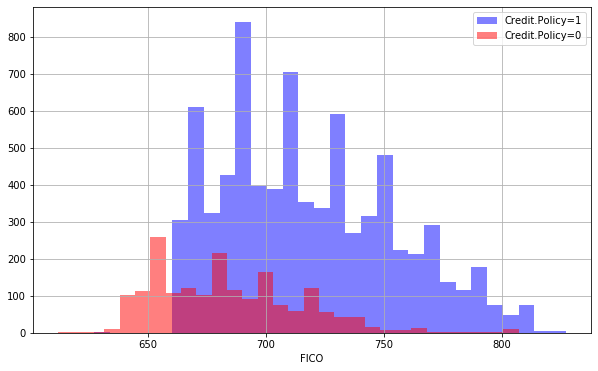

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

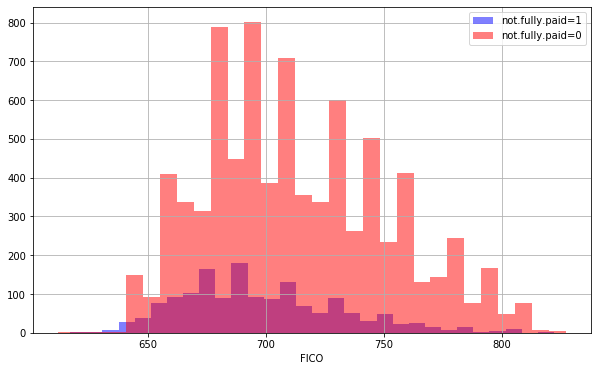

In [36]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

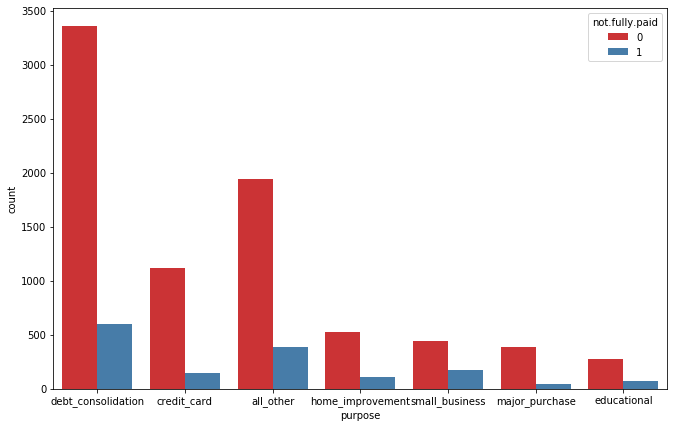

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

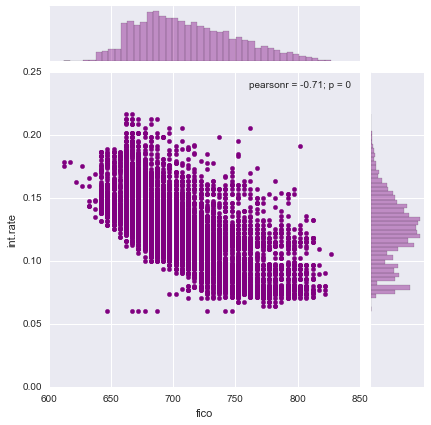

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

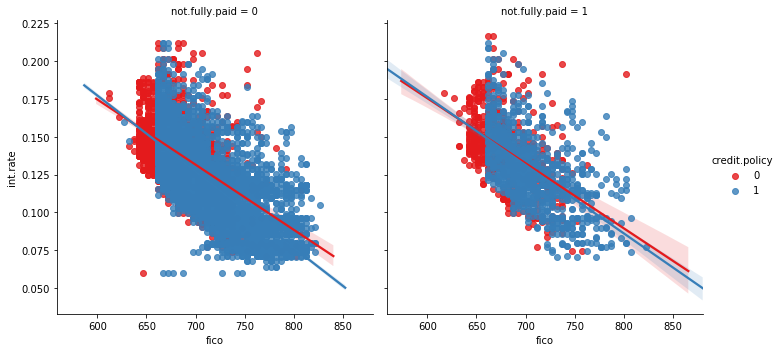

In [38]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Modificando los datos

Ahora modificaremos los datos para poder entenar un modelo Random Forest!

**Check loans.info() again.**

In [39]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Variables categóricas

Note que la columna **purpose** es categorica.

Esto significa que la tenemos que convertir en variables dummies para que sklearn la pueda interpretar. Lo haremos utilizando la función pd.get_dummies.

**Cree una lista de 1 elemento que contenga el string 'purpose'. Llame a esta lista cat_feats.**

In [9]:
cat_feats = ['purpose']

**Ahora usamos pd.get_dummies(loans,columns=cat_feats,drop_first=True) para crear un data frame que contenga las vriables dummies. Nombre este dataframe como final_data.**

In [10]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [11]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [13]:
final_data

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purpose_credit_card  \
0           0               0                    0   
1           0               0                    1   
2           0               0                    0   
3           0               0                    0   
4           0               0                    1   
...       ...             ...                  ...   
9573        0               1                    0   
9574        0               1                    0   
9575        0               1                    0   
9576        0               1                    0   
9577        0               1                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575                         0                       0                       0  
9576        

## Train Test Split

Ahora dividiremos nuestra data en train y test

** Utilice sklearn para dividir data en train y test.**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Entrenando un árbol de decisión

Empecemos entrenando un único árbol de decisión!

** Importe DecisionTreeClassifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predicciones y evaluaciones del árbol de decisión
**Obtenga las predicciones del árbol y obtenga una matriz de confusión.**

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [22]:
print(confusion_matrix(y_test,predictions))

[[2001  430]
 [ 339  104]]


## Entrenando un modelo de random forest

Ahora nos toca entrenar un modelo de random forest!

**Cree una instancia de la clase RandomForestClassifier y entrénelo con nuestra data de entrenamiento.**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

## Predicciones y evaluaciones

Ahora predigamos nuestra data de prueba!

** Prediga la data de prueba.**

In [58]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [61]:
print(confusion_matrix(y_test,predictions))

[[2422    9]
 [ 431   12]]


**What performed better the random forest or the decision tree?**